<a href="https://colab.research.google.com/github/LadyPary/DataMiningAssignments/blob/main/DM_HW2Part1_ZahraRabbany_610398124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_______
# **<center> Data Mining </center>**
### **<center> Assignment No. 2 (Part 1)</center>**

#### <center>Zahra Rabbany Khorasgani</center> 
<center>610398124</center>

#### <center>Prof. Hedieh Sajedi</center>
#### <center>Department of Computer Science, Tehran University</center>

#### <center>April 2022</center>
_______



## **Importing**

In [ ]:
#Necessary packages

# For computations
import pandas as pd
import numpy as np

# For visualisations
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#**Part 1: Maternal Health Risk Data Set**

**Attribute Information:**

*   **Age**: Any ages in years when a women is pregnant.

* **SystolicBP**: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **DiastolicBP**: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* **BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.
* **HeartRate**: A normal resting heart rate in beats per minute.
* **Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

### **1.1. Load**

In [ ]:
# loading data
df = pd.read_csv('https://raw.githubusercontent.com/LadyPary/DataMiningAssignments/main/HW2/Maternal%20Health%20Risk%20Data%20Set.csv')

In [ ]:
df.shape

(1014, 7)

In [ ]:
# printing the dataframe
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# description of data
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

### **1.2. Encoding on RiskLevel**



In [ ]:
df.loc[df['RiskLevel'] == 'low risk', 'RiskLevel'] = 0
df.loc[df['RiskLevel'] == 'mid risk', 'RiskLevel'] = 1
df.loc[df['RiskLevel'] == 'high risk', 'RiskLevel'] = 2

df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [ ]:
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel      float64
dtype: object

### **1.3. Data preprocessing**

#### **1.3.1. Missing Values**

In [ ]:
#Missing Valuse
df.isnull().sum() # no missing values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### **1.3.2. Duplicated Values**

In [ ]:
#Duplicated values 
duplicated_val = df.duplicated()
duplicated_val 

0       False
1       False
2       False
3       False
4       False
        ...  
1009     True
1010     True
1011     True
1012     True
1013     True
Length: 1014, dtype: bool

In [ ]:
#dropping duplicated values
df = df.drop_duplicates()
df.shape

(452, 7)

#### **1.3.3. Checking for Outliers**

We plot the boxplots to determine if there are outliers in the data:

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

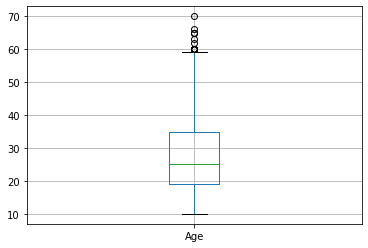

In [ ]:
df.boxplot(column=['Age'])

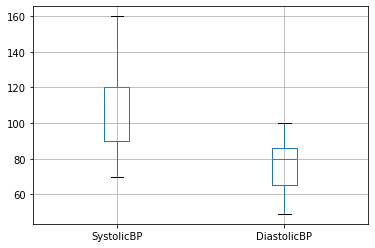

In [ ]:
df.boxplot(column=['SystolicBP', 'DiastolicBP'])

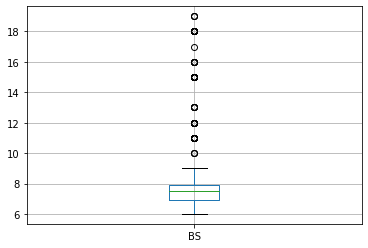

In [ ]:
df.boxplot(column=['BS'])

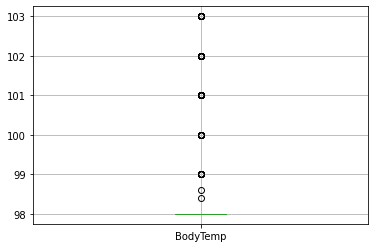

In [ ]:
df.boxplot(column=['BodyTemp'])

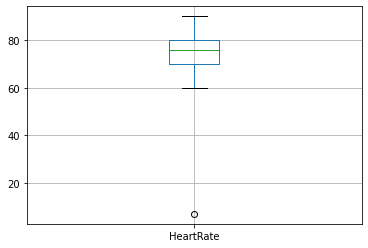

In [ ]:
df.boxplot(column=['HeartRate'])

### **1.4. Correlation**

In [ ]:
df['RiskLevel'].value_counts()

0.0    234
2.0    112
1.0    106
Name: RiskLevel, dtype: int64

In [ ]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407,0.183010
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088,0.327365
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470,0.254239
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605,0.548888
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262,0.259701
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000,0.183289
RiskLevel,0.183010,0.327365,0.254239,0.548888,0.259701,0.183289,1.000000


In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407,0.183010
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088,0.327365
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470,0.254239
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605,0.548888
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262,0.259701
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000,0.183289
RiskLevel,0.183010,0.327365,0.254239,0.548888,0.259701,0.183289,1.000000


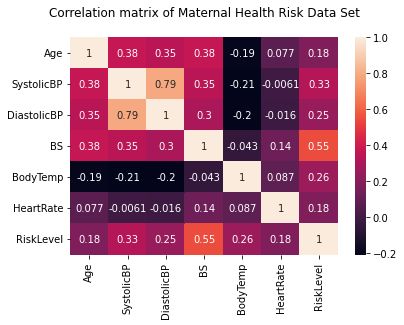

In [ ]:
hm = sns.heatmap(df.corr(), annot = True)

hm.set(#xlabel='XXX', ylabel='YYY',
       title = "Correlation matrix of Maternal Health Risk Data Set\n")

plt.show()

### **1.5. Shuffle data and split train/test data**
Seperate RiskLevel

In [ ]:
y = df['RiskLevel']
X = df.drop('RiskLevel',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle = True)

### **1.5.1. Standardizing features**

In [ ]:
#using StandardScaler to Standardizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### **1.6. Classification**

1. *   Classification Model
   *   Confusion Matrix
   *   Train/Test Accuracy
   *   Classification Report

For both before and after parameter tuning using cross validation

In [ ]:
accTable = {'Classification': ["Decision Tree","Decision Tree","KNN","KNN","SVM","SVM","Random Forest","Random Forest"],
            'ParameterTuning': ["before", "after","before", "after","before", "after","before", "after"],
            'Accuracy': [0 for i in range(8)],
            'Train accuracy': [0 for i in range(8)],
            'Test accuracy': [0 for i in range(8)]}

accDF = pd.DataFrame(data=accTable)

#### **1.6.1. Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier() #criterion{“gini”, “entropy”}, default=”gini”
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)
accDF.iat[0, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[0, 3]= round(decision_tree.score(X_train,y_train)* 100, 2)
accDF.iat[0, 4]= round(decision_tree.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[0, 2] ,'%')
print("Train accuracy:",accDF.iat[0, 3],'%')
print("Test accuracy:",accDF.iat[0, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test)))

decision_tree confusion_matrix :
 [[57  8  5]
 [19 11 11]
 [ 2  5 18]]
Accuracy: 63.24 %
Train accuracy: 95.25 %
Test accuracy: 63.24 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        70
         1.0       0.46      0.27      0.34        41
         2.0       0.53      0.72      0.61        25

    accuracy                           0.63       136
   macro avg       0.57      0.60      0.57       136
weighted avg       0.61      0.63      0.61       136



**Decision Tree Parameter tuning using Cross Validation**

In [ ]:
tree_param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_model = DecisionTreeClassifier(random_state=42)
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, verbose=-1)
tree_grid_search.fit(X_train, y_train)
tree_grid_search.best_params_


{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto'}

In [ ]:
best_params_ = list(tree_grid_search.best_params_.values())
decision_tree = DecisionTreeClassifier(ccp_alpha =  best_params_[0], criterion = best_params_[1], max_depth = best_params_[2], max_features = best_params_[3]) 
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print('decision_tree confusion_matrix :\n', dt_cm)

accDF.iat[1, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[1, 3]= round(decision_tree.score(X_train,y_train)* 100, 2)
accDF.iat[1, 4]= round(decision_tree.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[1, 2] ,'%')
print("Train accuracy:",accDF.iat[1, 3],'%')
print("Test accuracy:",accDF.iat[1, 4],'%')
print("classification_report:\n",classification_report(y_test, decision_tree.predict(X_test)))

decision_tree confusion_matrix :
 [[64  6  0]
 [21 12  8]
 [ 2  7 16]]
Accuracy: 67.65 %
Train accuracy: 74.68 %
Test accuracy: 67.65 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.74      0.91      0.82        70
         1.0       0.48      0.29      0.36        41
         2.0       0.67      0.64      0.65        25

    accuracy                           0.68       136
   macro avg       0.63      0.62      0.61       136
weighted avg       0.65      0.68      0.65       136



#### **1.6.2. KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDF.iat[2, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[2, 3]= round(knn.score(X_train,y_train)* 100, 2)
accDF.iat[2, 4]= round(knn.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[2, 2] ,'%')
print("Train accuracy:",accDF.iat[2, 3],'%')
print("Test accuracy:",accDF.iat[2, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test)))

knn confusion_matrix :
 [[63  5  2]
 [25  8  8]
 [ 7  3 15]]
Accuracy: 63.24 %
Train accuracy: 76.58 %
Test accuracy: 63.24 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.66      0.90      0.76        70
         1.0       0.50      0.20      0.28        41
         2.0       0.60      0.60      0.60        25

    accuracy                           0.63       136
   macro avg       0.59      0.57      0.55       136
weighted avg       0.60      0.63      0.59       136



**KNN Parameter tuning using Cross Validation**

In [ ]:
KNN_model = KNeighborsClassifier(algorithm='auto')
KNN_random_grid = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
grid_search_KNN = GridSearchCV(
    estimator=KNN_model,
    param_grid=KNN_random_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_KNN.fit(X_train, y_train)
grid_search_KNN.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
best_params_ = list(grid_search_KNN.best_params_.values())
knn = KNeighborsClassifier(leaf_size = best_params_[0], metric = best_params_[1], n_neighbors =  best_params_[2], p = best_params_[3], weights =  best_params_[4])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
print('knn confusion_matrix :\n', knn_cm)

accDF.iat[3, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[3, 3]= round(knn.score(X_train,y_train)* 100, 2)
accDF.iat[3, 4]= round(knn.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[3, 2] ,'%')
print("Train accuracy:",accDF.iat[3, 3],'%')
print("Test accuracy:",accDF.iat[3, 4],'%')

print("classification_report:\n",classification_report(y_test, knn.predict(X_test)))

knn confusion_matrix :
 [[65  2  3]
 [26  7  8]
 [ 7  2 16]]
Accuracy: 64.71 %
Train accuracy: 73.42 %
Test accuracy: 64.71 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.66      0.93      0.77        70
         1.0       0.64      0.17      0.27        41
         2.0       0.59      0.64      0.62        25

    accuracy                           0.65       136
   macro avg       0.63      0.58      0.55       136
weighted avg       0.64      0.65      0.59       136



#### **1.6.3. SVM**

In [ ]:
#Applying SVC (Support Vector Classification)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDF.iat[4, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[4, 3]= round(svm.score(X_train,y_train)* 100, 2)
accDF.iat[4, 4]= round(svm.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[4, 2] ,'%')
print("Train accuracy:",accDF.iat[4, 3],'%')
print("Test accuracy:",accDF.iat[4, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test)))

svm confusion_matrix :
 [[65  0  5]
 [27  5  9]
 [ 5  1 19]]
Accuracy: 65.44 %
Train accuracy: 74.68 %
Test accuracy: 65.44 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.67      0.93      0.78        70
         1.0       0.83      0.12      0.21        41
         2.0       0.58      0.76      0.66        25

    accuracy                           0.65       136
   macro avg       0.69      0.60      0.55       136
weighted avg       0.70      0.65      0.59       136



**SVM Parameter tuning using Cross Validation**

In [ ]:
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma':['scale', 'auto'] ,'kernel': ['rbf', 'poly', 'sigmoid']} #[1,0.1,0.01,0.001]
svm_model = SVC()
grid_search_svm = GridSearchCV(
    estimator= svm_model,
    param_grid=svm_param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
best_params_ = list(grid_search_svm.best_params_.values())
#Applying SVC (Support Vector Classification)
svm = SVC(C= best_params_[0], gamma =  best_params_[1], kernel= best_params_[2])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test, y_pred)
print('svm confusion_matrix :\n', svm_cm)

accDF.iat[5, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[5, 3]= round(svm.score(X_train,y_train)* 100, 2)
accDF.iat[5, 4]= round(svm.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[5, 2] ,'%')
print("Train accuracy:",accDF.iat[5, 3],'%')
print("Test accuracy:",accDF.iat[5, 4],'%')

print("classification_report:\n",classification_report(y_test, svm.predict(X_test)))

svm confusion_matrix :
 [[65  0  5]
 [27  5  9]
 [ 5  1 19]]
Accuracy: 65.44 %
Train accuracy: 74.68 %
Test accuracy: 65.44 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.67      0.93      0.78        70
         1.0       0.83      0.12      0.21        41
         2.0       0.58      0.76      0.66        25

    accuracy                           0.65       136
   macro avg       0.69      0.60      0.55       136
weighted avg       0.70      0.65      0.59       136



#### **1.6.4.  Random Forest**

first we try the default algorithm (without any parameter tuning):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDF.iat[6, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[6, 3]= round(random_forest.score(X_train,y_train)* 100, 2)
accDF.iat[6, 4]= round(random_forest.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[6, 2] ,'%')
print("Train accuracy:",accDF.iat[6, 3],'%')
print("Test accuracy:",accDF.iat[6, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test)))

random_forest confusion_matrix :
 [[60  5  5]
 [23  9  9]
 [ 2  4 19]]
Accuracy: 64.71 %
Train accuracy: 95.25 %
Test accuracy: 64.71 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        70
         1.0       0.50      0.22      0.31        41
         2.0       0.58      0.76      0.66        25

    accuracy                           0.65       136
   macro avg       0.59      0.61      0.58       136
weighted avg       0.62      0.65      0.61       136



We use cross validation to find the best parameters for the model:

In [ ]:
# random grid
random_grid = {'n_estimators': [100,500], 
               'max_features': ['auto', 'sqrt'], 
               'max_depth': [10,20],
               'min_samples_split': [2, 5, 10], 
               'min_samples_leaf':  [1, 2, 4]}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

we use the best parameters that we found to create a new model:

In [ ]:
best_params_ = list(rf_random.best_params_.values())
random_forest = RandomForestClassifier(max_depth= best_params_[4], max_features= best_params_[3],
 min_samples_leaf= best_params_[2],
 min_samples_split= best_params_[1],
 n_estimators= best_params_[0],random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print('random_forest confusion_matrix :\n', rf_cm)

accDF.iat[7, 2]= round(accuracy_score(y_test, y_pred)* 100, 2)
accDF.iat[7, 3]= round(random_forest.score(X_train,y_train)* 100, 2)
accDF.iat[7, 4]= round(random_forest.score(X_test,y_test)* 100, 2)

print('Accuracy:', accDF.iat[7, 2] ,'%')
print("Train accuracy:",accDF.iat[7, 3],'%')
print("Test accuracy:",accDF.iat[7, 4],'%')

print("classification_report:\n",classification_report(y_test, random_forest.predict(X_test)))

random_forest confusion_matrix :
 [[66  0  4]
 [27  3 11]
 [ 1  0 24]]
Accuracy: 68.38 %
Train accuracy: 81.33 %
Test accuracy: 68.38 %
classification_report:
               precision    recall  f1-score   support

         0.0       0.70      0.94      0.80        70
         1.0       1.00      0.07      0.14        41
         2.0       0.62      0.96      0.75        25

    accuracy                           0.68       136
   macro avg       0.77      0.66      0.56       136
weighted avg       0.78      0.68      0.59       136



we got better accuracy by using the best parameters!

### **1.7. Analysis**

Model accuracy before and after parameter tnning using cross validation.

In [ ]:
accDF.sort_values(by = 'Accuracy', ascending = False)

,Classification,ParameterTuning,Accuracy,Train accuracy,Test accuracy
7,Random Forest,after,68.38,81.33,68.38
1,Decision Tree,after,67.65,74.68,67.65
4,SVM,before,65.44,74.68,65.44
5,SVM,after,65.44,74.68,65.44
3,KNN,after,64.71,73.42,64.71
6,Random Forest,before,64.71,95.25,64.71
0,Decision Tree,before,63.24,95.25,63.24
2,KNN,before,63.24,76.58,63.24


[Text(0.5, 1.0, 'Model Accuracy Before and After Parameter Tuning')]

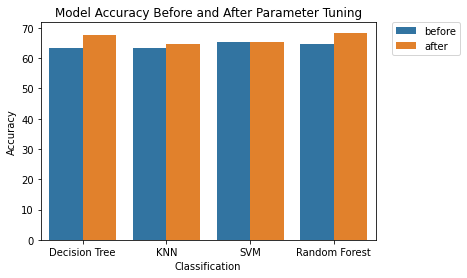

In [ ]:
ax = sns.barplot(x="Classification", y="Accuracy", hue="ParameterTuning", data=accDF)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set(title = "Model Accuracy Before and After Parameter Tuning")

### **1.8. Conclusions**

Notes from the barplot:


*   **Random forest** has the **highest accuracy** both before and after parameter tuning.
*   In order of accuracy we have high to low:
  * Random Forest
  * Decision Tree
  * SVM
  * KNN
* **Parameter tuning** using cross validation has **improved the accuracy** for all models except SVM (because the best parameters were already the default parameters of the algorithm). It had the **most impact** on **Decision tree**. 



---